<a href="https://colab.research.google.com/github/reasonj11/Machine-learning/blob/main/3-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [19]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [20]:
df.target.value_counts()

,count
target,
setosa,50
versicolor,50
virginica,50


In [21]:
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]


<Axes: title={'center': 'setosa sepal length'}, ylabel='Density'>

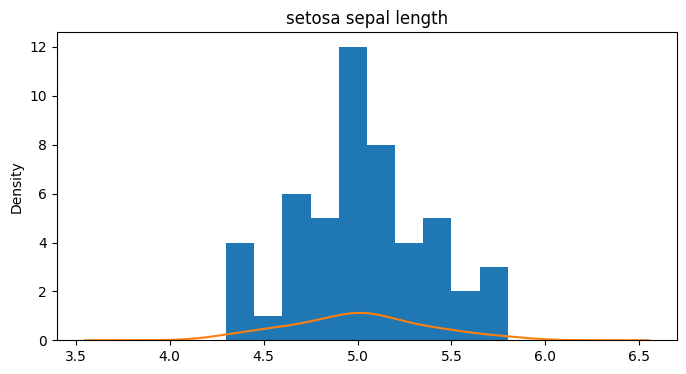

In [23]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="setosa sepal length",
                                    figsize = (8,4))

<Axes: >

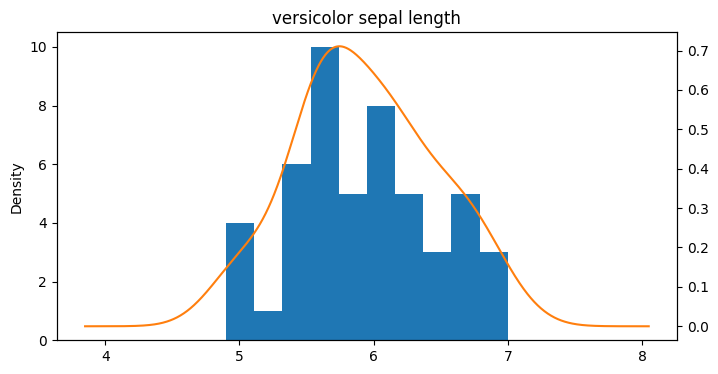

In [24]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde',
                                        ax=ax,
                                        secondary_y=True,
                                        title="versicolor sepal length",
                                        figsize = (8,4))

In [28]:
X_train,X_test,y_train,y_test=train_test_split(dataset.data,
                                               dataset.target, test_size=0.1)

In [30]:
model = GaussianNB()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

In [31]:
print(metrics.classification_report(y_test, predicted))
print(accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

1.0


In [32]:
print(metrics.confusion_matrix(expected, predicted))

[[7 0 0]
 [0 1 0]
 [0 0 7]]
